In [60]:
#Question Details - Dataset Amazon best selling book list

#Which author's books receive the highest average rating (top authors).
#Which author has written the most bestsellers (top authors).
#Which book has the most reviews (top books).
#Which genres become bestsellers more often.
#Are genres different by rating.

In [1]:
import pandas as pd

books_df=pd.read_csv('bestsellers with categories.csv')
print(books_df.head())

print(books_df.info())

                                                Name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     Author  User Rating  Reviews  Price  Year        Genre  
0                  JJ Smith          4.7    17350      8  2016  Non Fiction  
1              Stephen King          4.6     2052     22  2011      Fiction  
2        Jordan B. Peterson          4.7    18979     15  2018  Non Fiction  
3             George Orwell          4.7    21424      6  2017      Fiction  
4  National Geographic Kids          4.8     7665     12  2019  Non Fiction  


In [3]:
print(books_df['Author'].sort_values().nunique())
books_df=books_df.replace('George R. R. Martin', 'George R.R. Martin')
books_df=books_df.replace('J. K. Rowling', 'J.K. Rowling')
print(books_df['Author'].sort_values().nunique())

248
246


In [4]:
print(books_df['Genre'].sort_values().unique())
print(books_df['Year'].sort_values().unique())

['Fiction' 'Non Fiction']
[2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019]


In [5]:
print(books_df.head(50))

                                                 Name  \
0                       10-Day Green Smoothie Cleanse   
1                                   11/22/63: A Novel   
2             12 Rules for Life: An Antidote to Chaos   
3                              1984 (Signet Classics)   
4   5,000 Awesome Facts (About Everything!) (Natio...   
5       A Dance with Dragons (A Song of Ice and Fire)   
6   A Game of Thrones / A Clash of Kings / A Storm...   
7                      A Gentleman in Moscow: A Novel   
8       A Higher Loyalty: Truth, Lies, and Leadership   
9                           A Man Called Ove: A Novel   
10                          A Man Called Ove: A Novel   
11  A Patriot's History of the United States: From...   
12                            A Stolen Life: A Memoir   
13                   A Wrinkle in Time (Time Quintet)   
14  Act Like a Lady, Think Like a Man: What Men Re...   
15  Adult Coloring Book Designs: Stress Relief Col...   
16  Adult Coloring Book: Stress

In [6]:
#Due to the year column there were several duplicate rows, so to remove duplicates we are removing the column Year.
del books_df['Year']

In [7]:
books_df=books_df.drop_duplicates(keep='first')
books_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 361 entries, 0 to 546
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         361 non-null    object 
 1   Author       361 non-null    object 
 2   User Rating  361 non-null    float64
 3   Reviews      361 non-null    int64  
 4   Price        361 non-null    int64  
 5   Genre        361 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 19.7+ KB


In [8]:
from collections import Counter
count_books=Counter(books_df.Name)
print(count_books.most_common(15))

[('The Help', 3), ('Gone Girl', 2), ("Quiet: The Power of Introverts in a World That Can't Stop Talking", 2), ('The 7 Habits of Highly Effective People: Powerful Lessons in Personal Change', 2), ('The Fault in Our Stars', 2), ('The Girl on the Train', 2), ('The Immortal Life of Henrietta Lacks', 2), ('To Kill a Mockingbird', 2), ('Unbroken: A World War II Story of Survival, Resilience, and Redemption', 2), ('10-Day Green Smoothie Cleanse', 1), ('11/22/63: A Novel', 1), ('12 Rules for Life: An Antidote to Chaos', 1), ('1984 (Signet Classics)', 1), ('5,000 Awesome Facts (About Everything!) (National Geographic Kids)', 1), ('A Dance with Dragons (A Song of Ice and Fire)', 1)]


In [9]:
print(books_df[books_df['Name'] == 'The Help'])

         Name            Author  User Rating  Reviews  Price    Genre
402  The Help  Kathryn Stockett          4.8    13871      6  Fiction
404  The Help  Kathryn Stockett          4.8    13871      8  Fiction
405  The Help  Kathryn Stockett          4.8    13871      7  Fiction


In [10]:
books_df=books_df.drop_duplicates(subset='Name',keep='last')

In [11]:
books_df[books_df['Name']=='The Help']

,Name,Author,User Rating,Reviews,Price,Genre
405,The Help,Kathryn Stockett,4.8,13871,7,Fiction


In [12]:
books_df['Name'].nunique()

351

In [14]:
from matplotlib import pyplot as plt
top_15_authors=books_df.groupby('Author')[['User Rating']].mean().sort_values('User Rating',ascending=False).head(15).reset_index()
print(top_15_authors)

                   Author  User Rating
0          Nathan W. Pyle         4.90
1          Patrick Thorpe         4.90
2              Eric Carle         4.90
3   Emily Winfield Martin         4.90
4             Chip Gaines         4.90
5              Jill Twiss         4.90
6           Rush Limbaugh         4.90
7    Sherri Duskey Rinker         4.90
8          Alice Schertle         4.90
9              Pete Souza         4.90
10            Sarah Young         4.90
11     Lin-Manuel Miranda         4.90
12        Bill Martin Jr.         4.90
13             Dav Pilkey         4.90
14        Brandon Stanton         4.85


            Author  Name
0      Jeff Kinney    12
1     Rick Riordan    10
2     J.K. Rowling     8
3  Stephenie Meyer     7
4    Bill O'Reilly     6
5       Dav Pilkey     6
6        E L James     5
7  Suzanne Collins     5
8     John Grisham     5
9    Stieg Larsson     4


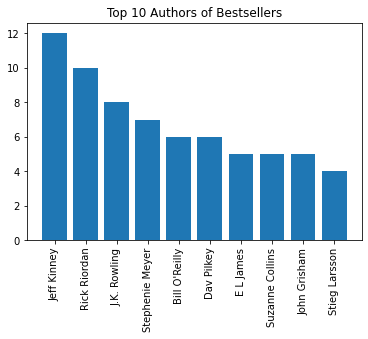

In [27]:
top_10_books=books_df.groupby('Author')[['Name']].count().sort_values('Name',ascending=False).head(10).reset_index()
print(top_10_books)
plt.bar(top_10_books['Author'],top_10_books['Name'])
plt.xticks(rotation='vertical')
plt.title('Top 10 Authors of Bestsellers')
plt.show()

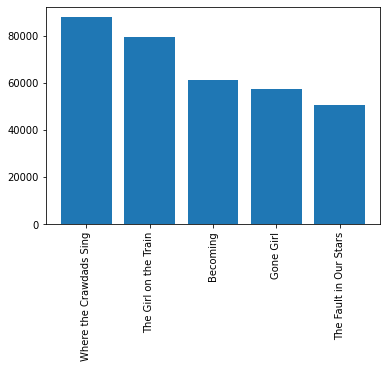

In [16]:
top_5_books_with_most_reviews=books_df.groupby('Name')[['Reviews']].sum().sort_values('Reviews',ascending=False).head(5).reset_index()
plt.bar(top_5_books_with_most_reviews['Name'],top_5_books_with_most_reviews['Reviews'])
plt.xticks(rotation='vertical')
plt.show()

([<matplotlib.patches.Wedge at 0x7efe77aec190>,
 [Text(-0.15211534367268678, 1.08943146742663, 'Non Fiction'),
  Text(0.15211534367268642, -1.08943146742663, 'Fiction')])

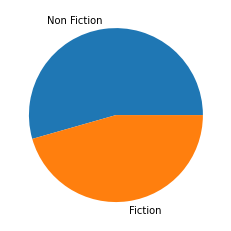

In [17]:
books_genre=books_df.groupby('Genre')[['Name']].count().sort_values('Name',ascending=False).head(10).reset_index()
plt.pie(books_genre['Name'],labels=books_genre['Genre'])

In [18]:
books_df.describe().T

,count,mean,std,min,25%,50%,75%,max
User Rating,351.0,4.609117,0.226721,3.3,4.5,4.6,4.8,4.9
Reviews,351.0,9786.578348,10874.702548,37.0,3442.5,6310.0,11470.5,87841.0
Price,351.0,12.968661,10.021214,0.0,7.5,11.0,16.0,105.0


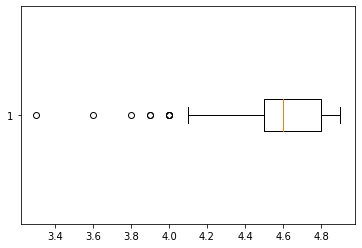

In [20]:
plt.boxplot(books_df['User Rating'],vert=False)
plt.show()

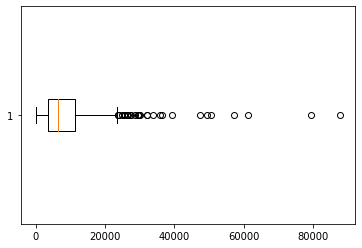

In [21]:
plt.boxplot(books_df['Reviews'],vert=False)
plt.show()

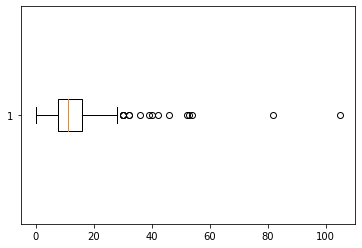

In [22]:
plt.boxplot(books_df['Price'],vert=False)
plt.show()

In [23]:
books_df.corr()

,User Rating,Reviews,Price
User Rating,1.000000,-0.056105,-0.026408
Reviews,-0.056105,1.000000,-0.048029
Price,-0.026408,-0.048029,1.000000


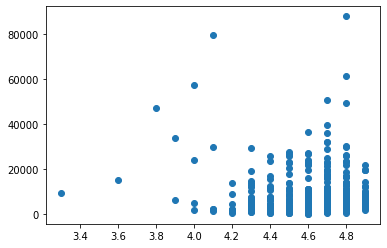

In [24]:
plt.scatter(books_df['User Rating'],books_df['Reviews'])
plt.show()

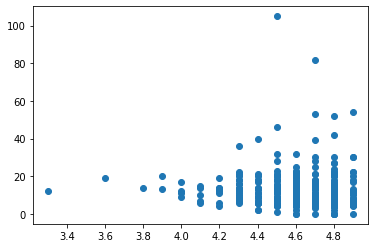

In [25]:
plt.scatter(books_df['User Rating'],books_df['Price'])
plt.show()

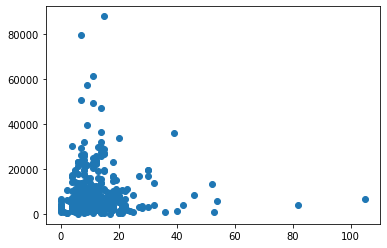

In [26]:
plt.scatter(books_df['Price'],books_df['Reviews'])
plt.show()

In [29]:
import scipy.stats as stats

In [40]:
alpha=0.05
tstat,pval = stats.shapiro(books_df['User Rating'])

if pval > alpha:
    print('Accept H0 - Data is distributed normally')
if pval < alpha:
    print('Reject H0 - Data is not distributed normally')

Reject H0 - Data is not distributed normally


In [42]:
non_fiction=books_df[books_df['Genre']=='Non Fiction']['User Rating']
fiction=books_df[books_df['Genre']=='Fiction']['User Rating']

In [43]:
alpha=0.05
tstat,pval = stats.mannwhitneyu(non_fiction,fiction)
if pval > 0.05:
    print('Accept H0 - There is no significant difference in the groups')
if pval < 0.05:
    print('Reject H0 - There are significant difference between the groups')

Reject H0 - There are significant difference between the groups


In [49]:
print('Median of non fiction:', non_fiction.median(), '\nMedian of fiction', fiction.median())

Median of non fiction: 4.6 
Median of fiction 4.7


(array([ 1.,  2.,  5., 10., 19., 23., 47., 40., 38.,  6.]),
 array([4.  , 4.09, 4.18, 4.27, 4.36, 4.45, 4.54, 4.63, 4.72, 4.81, 4.9 ]),
 <BarContainer object of 10 artists>)

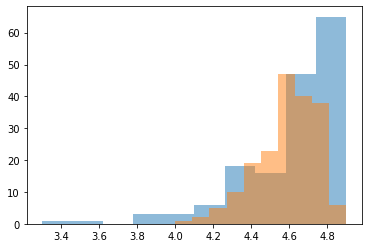

In [58]:
plt.hist(fiction,alpha=0.5)
plt.hist(non_fiction,alpha=0.5)

In [59]:
#insight - As a result of the testing, statistically significant differences were obtained between the compared groups. Based on the results obtained, 
#it can be argued that users evaluate books differently depending on the genre, and based on the median values, readers give preference to works of fiction.